In [77]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('E-commerce Customer Behavior - Sheet1.csv')

# Basic Checks 

In [3]:
data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
data.tail()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [5]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [6]:
data.dtypes

Customer ID                   int64
Gender                       object
Age                           int64
City                         object
Membership Type              object
Total Spend                 float64
Items Purchased               int64
Average Rating              float64
Discount Applied               bool
Days Since Last Purchase      int64
Satisfaction Level           object
dtype: object

In [7]:
data.shape

(350, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [9]:
data.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [10]:
#checking null values
data.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data=data.drop_duplicates(subset=None, keep='first')
     

In [13]:
data.duplicated().sum()

0

# Dropping unnecessary column 

In [14]:
data.drop(columns=['Customer ID'],inplace=True)

In [15]:
data

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


# EDA 

# Univariant Analysis 

1.Gender 

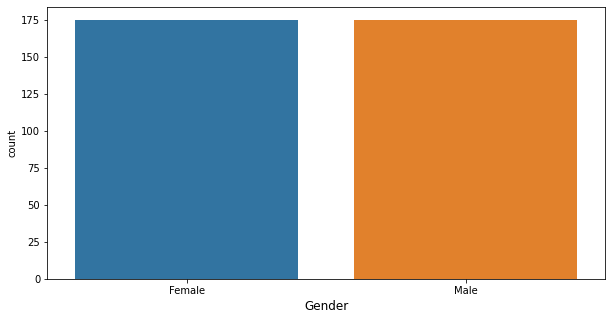

In [16]:
plt.figure(figsize=(10,5))
sns.countplot( x = 'Gender',data = data)
plt.xlabel('Gender',fontsize=12)
plt.show()

2.Age

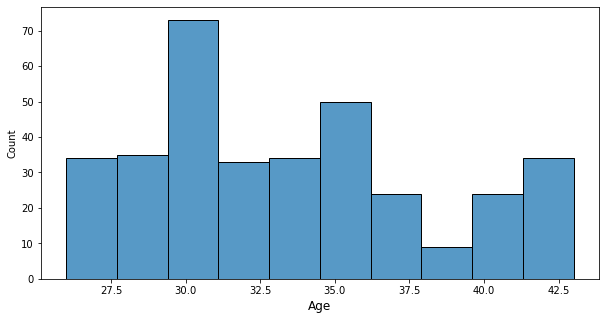

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(x='Age',data=data)
plt.xlabel('Age',fontsize=12)
plt.show()

3.City 

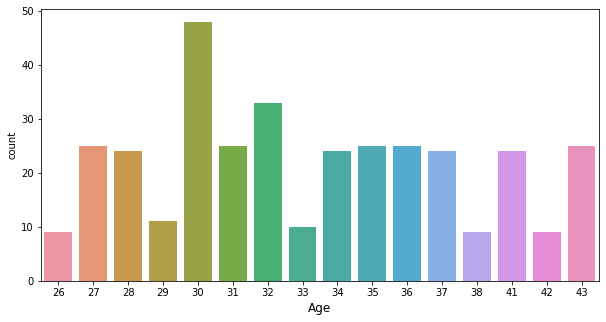

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age',data=data)
plt.xlabel('Age',fontsize=12)
plt.show()

4.Membership Type

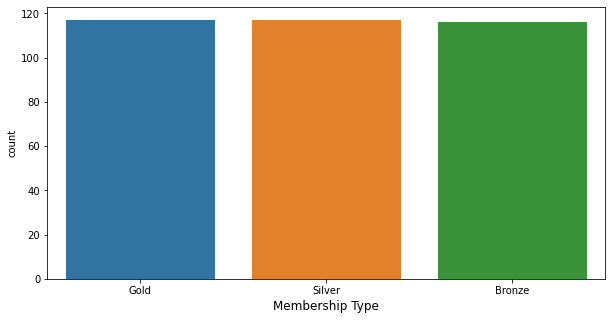

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='Membership Type',data=data)
plt.xlabel('Membership Type',fontsize=12)
plt.show()

5.Total Spend

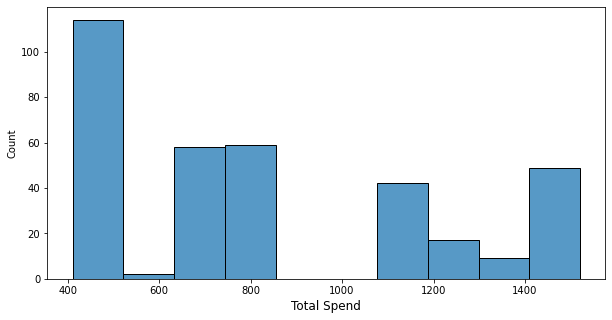

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(x='Total Spend',data=data)
plt.xlabel('Total Spend',fontsize=12)
plt.show()

6.Items Purchased

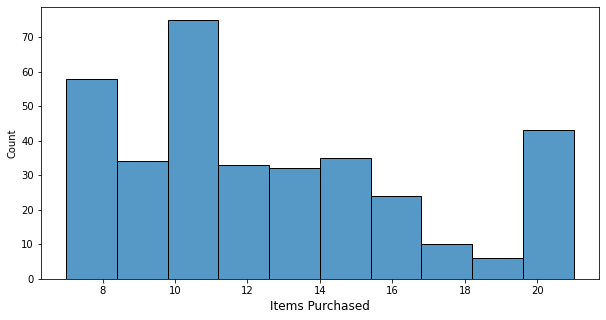

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(x='Items Purchased',data=data)
plt.xlabel('Items Purchased',fontsize=12)
plt.show()

7.Average Rating

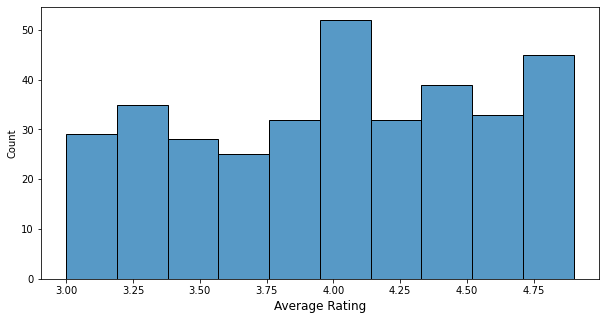

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(x='Average Rating',data=data)
plt.xlabel('Average Rating',fontsize=12)
plt.show()

8.Discount Applied	

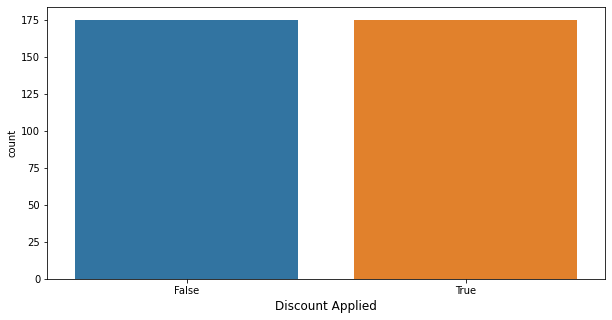

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='Discount Applied',data=data)
plt.xlabel('Discount Applied',fontsize=12)
plt.show()

9.Days Since Last Purchase

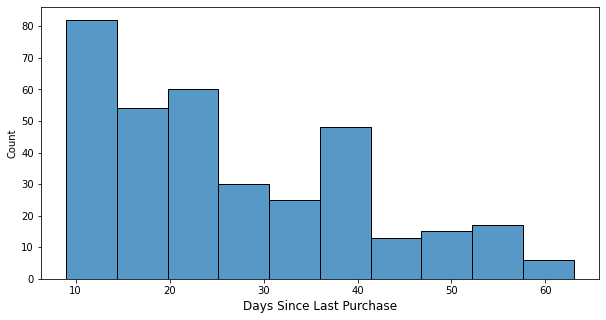

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(x='Days Since Last Purchase',data=data)
plt.xlabel('Days Since Last Purchase',fontsize=12)
plt.show()

10.Satisfaction Level

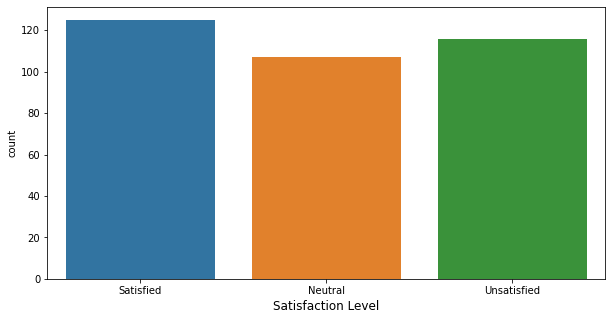

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='Satisfaction Level',data=data)
plt.xlabel('Satisfaction Level',fontsize=12)
plt.show()

# Bivariant Analysis 

In [26]:
data.columns

Index(['Gender', 'Age', 'City', 'Membership Type', 'Total Spend',
       'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

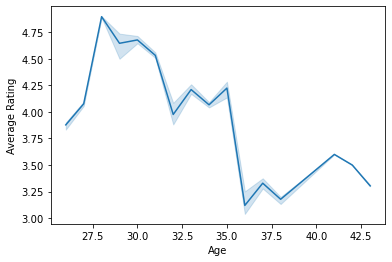

In [27]:
sns.lineplot ( x = 'Age', y = 'Average Rating', data = data)
plt.show()

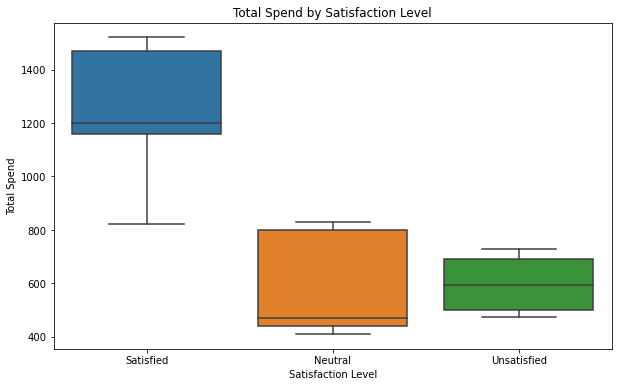

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Satisfaction Level', y='Total Spend', data=data)
plt.title('Total Spend by Satisfaction Level')
plt.show()

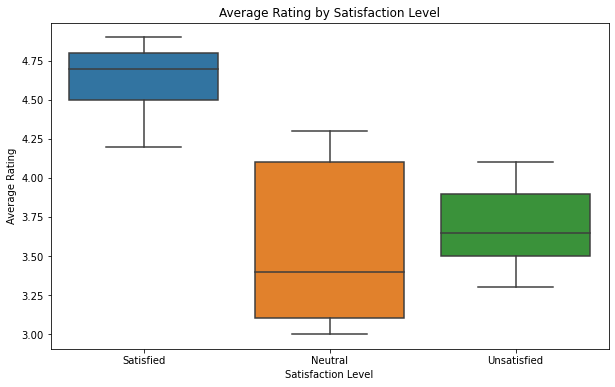

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Satisfaction Level', y='Average Rating', data=data)
plt.title('Average Rating by Satisfaction Level')
plt.show()

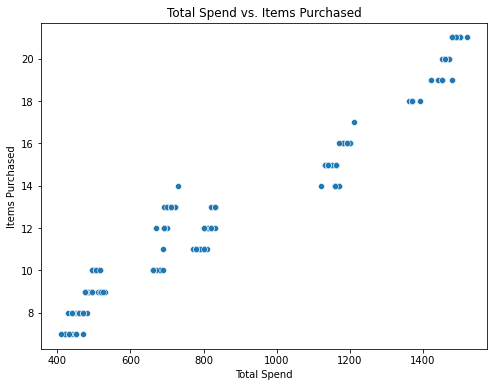

In [30]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Spend', y='Items Purchased', data=data)
plt.title('Total Spend vs. Items Purchased')
plt.xlabel('Total Spend')
plt.ylabel('Items Purchased')
plt.show()

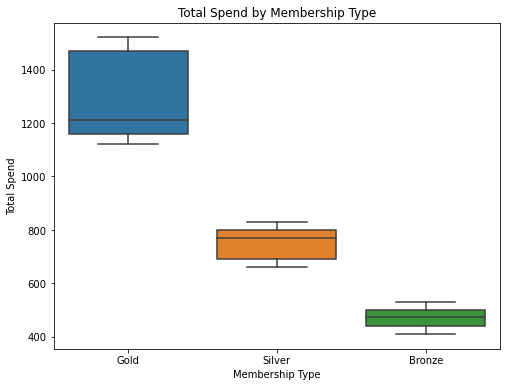

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Membership Type', y='Total Spend', data=data)
plt.title('Total Spend by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Total Spend')
plt.show()

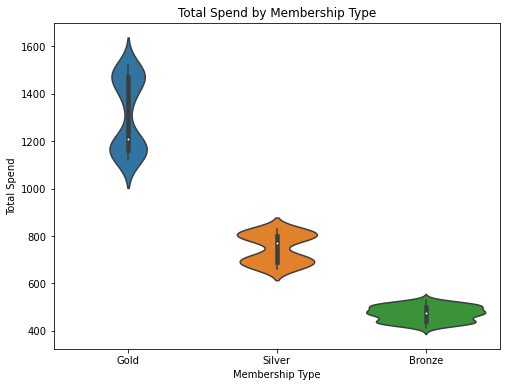

In [32]:
# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Membership Type', y='Total Spend', data=data)
plt.title('Total Spend by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Total Spend')
plt.show()

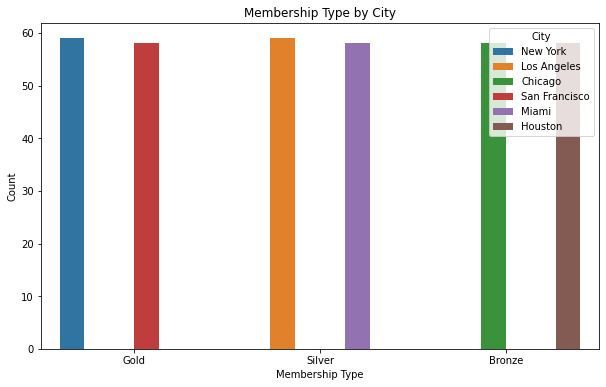

In [33]:
# Count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Membership Type', hue='City', data=data)
plt.title('Membership Type by City')
plt.xlabel('Membership Type')
plt.ylabel('Count')
plt.show()

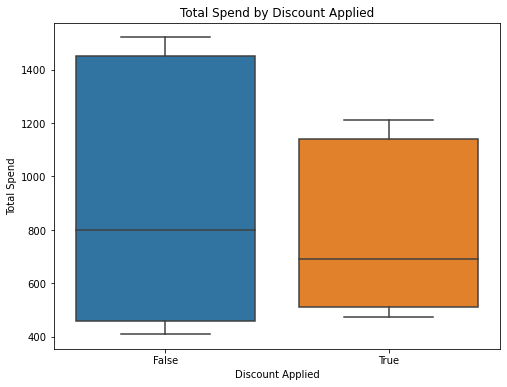

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Discount Applied', y='Total Spend', data=data)
plt.title('Total Spend by Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Total Spend')
plt.show()

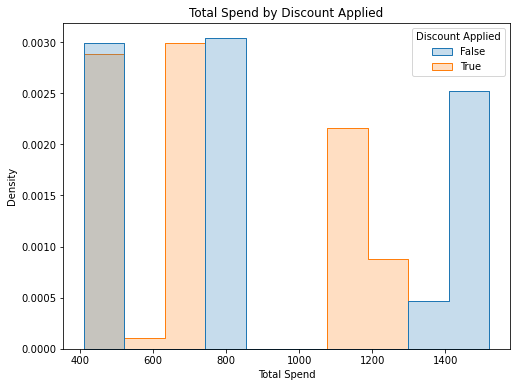

In [35]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Total Spend', hue='Discount Applied', element='step', stat='density', common_norm=False)
plt.title('Total Spend by Discount Applied')
plt.xlabel('Total Spend')
plt.ylabel('Density')
plt.show()

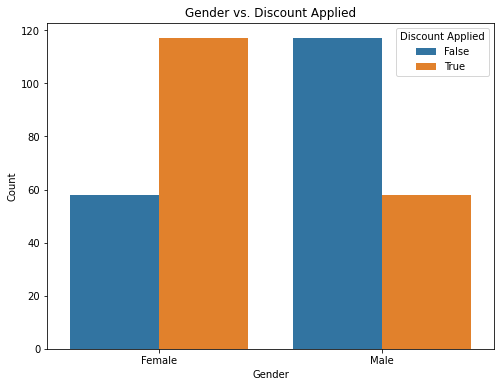

In [36]:
# Count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Discount Applied', data=data)
plt.title('Gender vs. Discount Applied')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

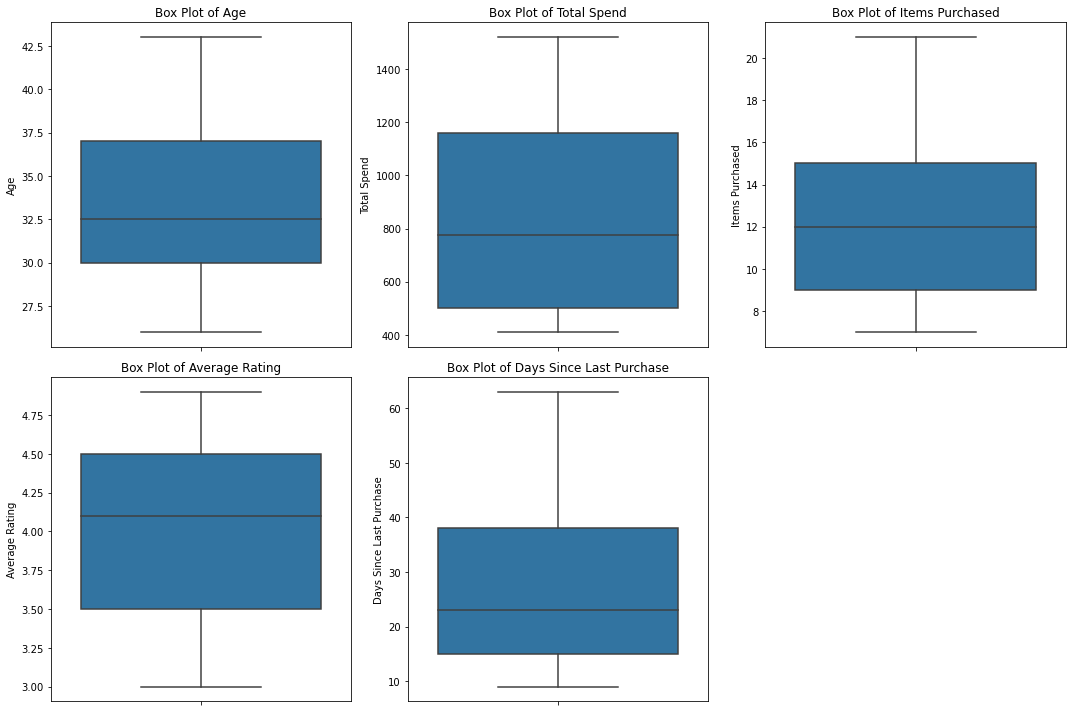

In [37]:
#checking outliers 
numerical_features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Correlation Matrix 

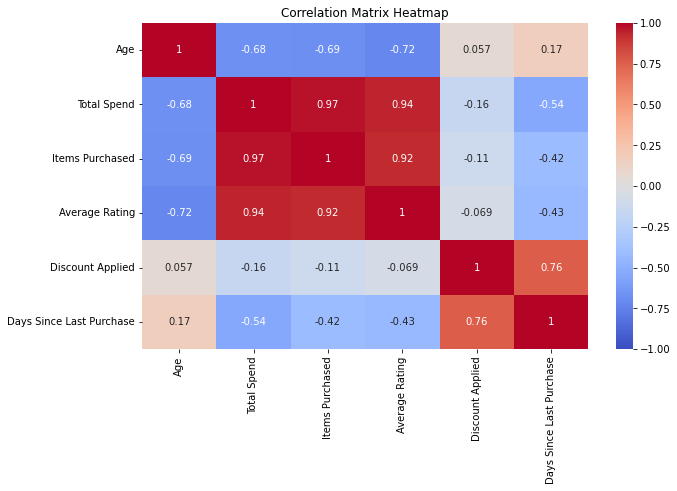

In [38]:
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [39]:
data.corr()

,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
Age,1.000000,-0.677918,-0.685274,-0.722277,0.056979,0.168763
Total Spend,-0.677918,1.000000,0.972425,0.941475,-0.160723,-0.540089
Items Purchased,-0.685274,0.972425,1.000000,0.922028,-0.114285,-0.420393
Average Rating,-0.722277,0.941475,0.922028,1.000000,-0.068507,-0.430757
Discount Applied,0.056979,-0.160723,-0.114285,-0.068507,1.000000,0.759543
Days Since Last Purchase,0.168763,-0.540089,-0.420393,-0.430757,0.759543,1.000000


# Converting categorical to numerical 

In [44]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Gender'] = lb.fit_transform(data['Gender'])
data['City'] = lb.fit_transform(data['City'])
data['Membership Type'] = lb.fit_transform(data['Membership Type'])
data['Discount Applied'] = lb.fit_transform(data['Discount Applied'])
data['Satisfaction Level'] = lb.fit_transform(data['Satisfaction Level'])


In [45]:
data

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,0,29,4,1,1120.20,14,4.6,1,25,1
1,1,34,2,2,780.50,11,4.1,0,18,0
2,0,43,0,0,510.75,9,3.4,1,42,2
3,1,30,5,1,1480.30,19,4.7,0,12,1
4,1,27,3,2,720.40,13,4.0,1,55,2
...,...,...,...,...,...,...,...,...,...,...
345,1,32,3,2,660.30,10,3.8,1,42,2
346,0,36,1,0,470.50,8,3.0,0,27,0
347,0,30,4,1,1190.80,16,4.5,1,28,1
348,1,34,2,2,780.20,11,4.2,0,21,0


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    350 non-null    int64  
 1   Age                       350 non-null    int64  
 2   City                      350 non-null    int32  
 3   Membership Type           350 non-null    int32  
 4   Total Spend               350 non-null    float64
 5   Items Purchased           350 non-null    int64  
 6   Average Rating            350 non-null    float64
 7   Discount Applied          350 non-null    int64  
 8   Days Since Last Purchase  350 non-null    int64  
 9   Satisfaction Level        350 non-null    int32  
dtypes: float64(2), int32(3), int64(5)
memory usage: 34.1 KB


In [58]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform it
df_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
df_scaled_df = pd.DataFrame(df_scaled, columns=data.columns)

# View the scaled DataFrame
print(df_scaled_df.head())

   Gender       Age      City  Membership Type  Total Spend  Items Purchased  \
0    -1.0 -0.945152  0.878073        -0.003502     0.760130         0.337346   
1     1.0  0.082826 -0.294925         1.222126    -0.179459        -0.385538   
2    -1.0  1.933185 -1.467924        -1.229130    -0.925570        -0.867461   
3     1.0 -0.739557  1.464572        -0.003502     1.756144         1.542153   
4     1.0 -1.356343  0.291574         1.222126    -0.345692         0.096385   

   Average Rating  Discount Applied  Days Since Last Purchase  \
0        1.001981               1.0                 -0.118359   
1        0.139479              -1.0                 -0.639907   
2       -1.068024               1.0                  1.148256   
3        1.174482              -1.0                 -1.086947   
4       -0.033022               1.0                  2.116844   

   Satisfaction Level  
0           -0.045768  
1           -1.277971  
2            1.186436  
3           -0.045768  
4       

scale all the columns in your DataFrame so that each feature has a mean of 0 and a standard deviation of 1. This is especially useful for clustering algorithms like K-Means, which are sensitive to the scale of the input data.

# Model Building 

In [62]:
from sklearn.cluster import KMeans

In [71]:
optimal_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(df_scaled_df)

# Add the cluster labels to the original DataFrame
df_scaled_df['Cluster'] = kmeans.labels_

# View the DataFrame with cluster labels
print(df_scaled_df.head())



   Gender       Age      City  Membership Type  Total Spend  Items Purchased  \
0    -1.0 -0.945152  0.878073        -0.003502     0.760130         0.337346   
1     1.0  0.082826 -0.294925         1.222126    -0.179459        -0.385538   
2    -1.0  1.933185 -1.467924        -1.229130    -0.925570        -0.867461   
3     1.0 -0.739557  1.464572        -0.003502     1.756144         1.542153   
4     1.0 -1.356343  0.291574         1.222126    -0.345692         0.096385   

   Average Rating  Discount Applied  Days Since Last Purchase  \
0        1.001981               1.0                 -0.118359   
1        0.139479              -1.0                 -0.639907   
2       -1.068024               1.0                  1.148256   
3        1.174482              -1.0                 -1.086947   
4       -0.033022               1.0                  2.116844   

   Satisfaction Level  Cluster  
0           -0.045768        0  
1           -1.277971        4  
2            1.186436        

In [72]:
 #Optional: Analyze the resulting clusters
cluster_analysis = df_scaled_df.groupby('Cluster').mean()
print(cluster_analysis)

           Gender       Age      City  Membership Type  Total Spend  \
Cluster                                                               
0        0.008547 -0.755372  1.168816        -0.003502     1.288270   
1       -1.000000  0.637199 -0.881425        -1.229130    -1.100106   
2        0.965517 -0.955786  0.291574         1.222126    -0.428698   
3       -1.000000  1.696751 -1.448374        -1.229130    -0.962459   
4        1.000000  0.107218 -0.294925         1.222126    -0.110334   

         Items Purchased  Average Rating  Discount Applied  \
Cluster                                                      
0               1.208514        1.131725          0.008547   
1              -1.207389       -1.428427         -1.000000   
2              -0.231821       -0.157936          1.000000   
3              -0.787140       -0.981774          0.933333   
4              -0.222175        0.265200         -1.000000   

         Days Since Last Purchase  Satisfaction Level  
Cluster    

In [73]:
from sklearn.metrics import silhouette_score

# Assuming df_scaled_df is your scaled DataFrame and kmeans is your trained KMeans model
silhouette_avg = silhouette_score(df_scaled_df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7437004531327084


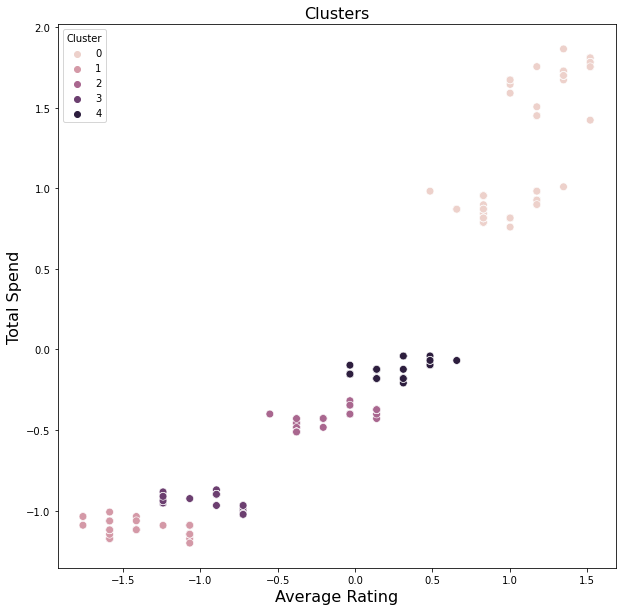

In [76]:
plt.figure(figsize=(10, 10))

# Assuming 'Average Rating' and 'Total Spend' are columns in your DataFrame
sns.scatterplot(x='Average Rating', y='Total Spend', s=60, data=df_scaled_df, hue='Cluster')
plt.title('Clusters', fontsize=16)
plt.xlabel('Average Rating', fontsize=16)
plt.ylabel('Total Spend', fontsize=16)
plt.show()